In [1]:
import numpy as np
import pandas as pd
import subprocess
import argparse
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
#from matplotlib import rc
#rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
#rc('text', usetex=True)

def bins_labels(bins, startValue=0, **kwargs):
    bin_w = (max(bins) - min(bins)) / (len(bins) - 1)
    plt.xticks(np.arange(min(bins)+bin_w/2, max(bins), bin_w), bins, **kwargs)
    plt.xlim(bins[startValue], bins[-1])

C:\Users\romai\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
jobs = pd.read_csv("../../data/cb12/interim/nlp_items.csv", header=0, sep='\t')
jobs.head()

,Unnamed: 0,item_id,city,state,country,zip5,title_emb_0,title_emb_1,title_emb_2,title_emb_3,...,req_emb_374,req_emb_375,req_emb_376,req_emb_377,req_emb_378,req_emb_379,req_emb_380,req_emb_381,req_emb_382,req_emb_383
0,0,22,Orlando,FL,US,32819.0,0.031234,-0.058801,-0.023616,-0.037820,...,-0.032298,0.05112,0.013713,-0.029943,-0.031015,0.029654,0.019965,0.076117,0.038724,-0.024348
1,1,60,Orlando,FL,US,32803.0,-0.022986,0.054471,-0.016137,0.042382,...,-0.032298,0.05112,0.013713,-0.029943,-0.031015,0.029654,0.019965,0.076117,0.038724,-0.024348
2,2,81,Orlando,FL,US,32801.0,-0.038087,0.080151,-0.052039,0.015201,...,-0.032298,0.05112,0.013713,-0.029943,-0.031015,0.029654,0.019965,0.076117,0.038724,-0.024348
3,3,244,Baltimore,MD,US,21227.0,-0.012535,0.010516,-0.009069,0.006332,...,-0.032298,0.05112,0.013713,-0.029943,-0.031015,0.029654,0.019965,0.076117,0.038724,-0.024348
4,4,370,Tallahassee,FL,US,32301.0,-0.023253,0.037175,-0.022867,0.073320,...,-0.032298,0.05112,0.013713,-0.029943,-0.031015,0.029654,0.019965,0.076117,0.038724,-0.024348


In [3]:
interactions = pd.read_csv("../../data/cb12/interim/merged_valid_interactions.csv", header=0, sep='\t')
interactions.head(3)

,Unnamed: 0,user_id,created_at,item_id,interaction_type,session_id
0,0,9,1337034642,809208,0,3
1,1,9,1337035117,136489,0,3
2,2,9,1337035689,617374,0,3


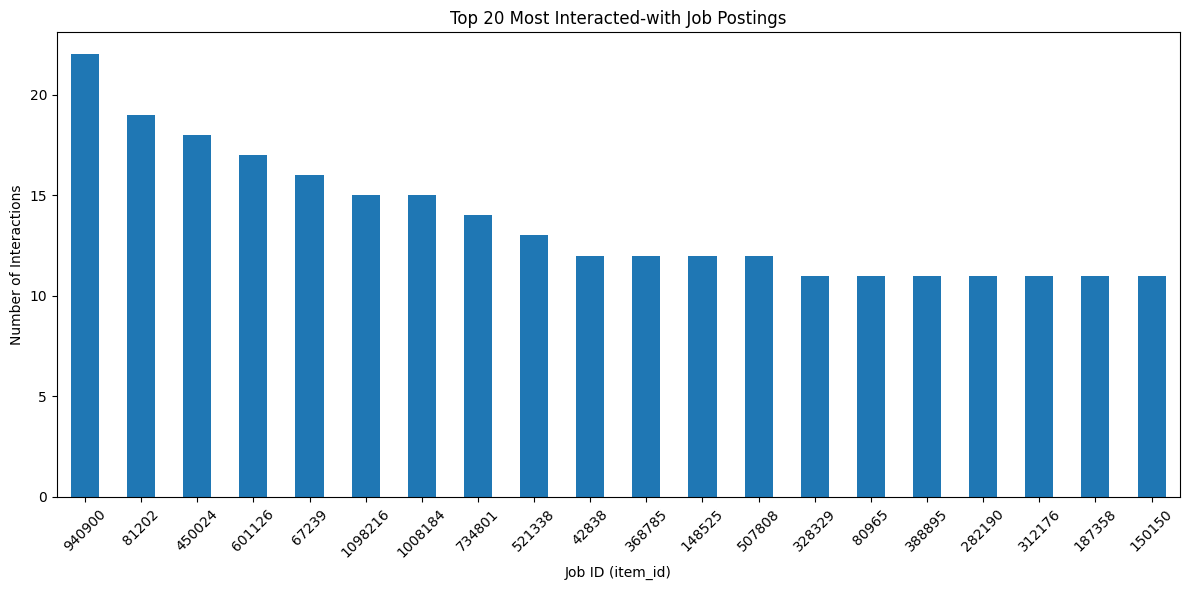

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Example: assuming you already have the interactions DataFrame
# interactions = pd.read_csv("your_interactions_file.csv")

# Count the number of interactions per job (item_id)
job_counts = interactions["item_id"].value_counts().sort_values(ascending=False)

# Plot the top N most interacted-with jobs
top_n = 20  # you can change this value
plt.figure(figsize=(12, 6))
job_counts.head(top_n).plot(kind='bar')
plt.title(f"Top {top_n} Most Interacted-with Job Postings")
plt.xlabel("Job ID (item_id)")
plt.ylabel("Number of Interactions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


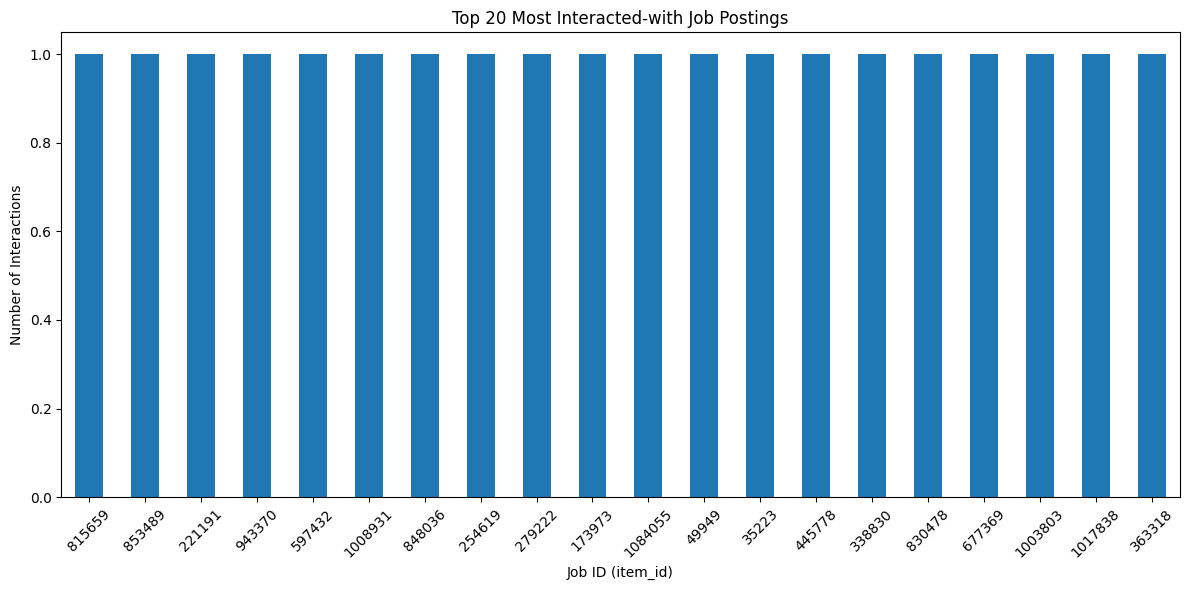

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Example: assuming you already have the interactions DataFrame
# interactions = pd.read_csv("your_interactions_file.csv")

# Count the number of interactions per job (item_id)
job_counts = interactions["item_id"].value_counts().sort_values(ascending=False)

# Plot the top N most interacted-with jobs
top_n = 20  # you can change this value
plt.figure(figsize=(12, 6))
job_counts.tail(top_n).plot(kind='bar')
plt.title(f"Top {top_n} Most Interacted-with Job Postings")
plt.xlabel("Job ID (item_id)")
plt.ylabel("Number of Interactions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


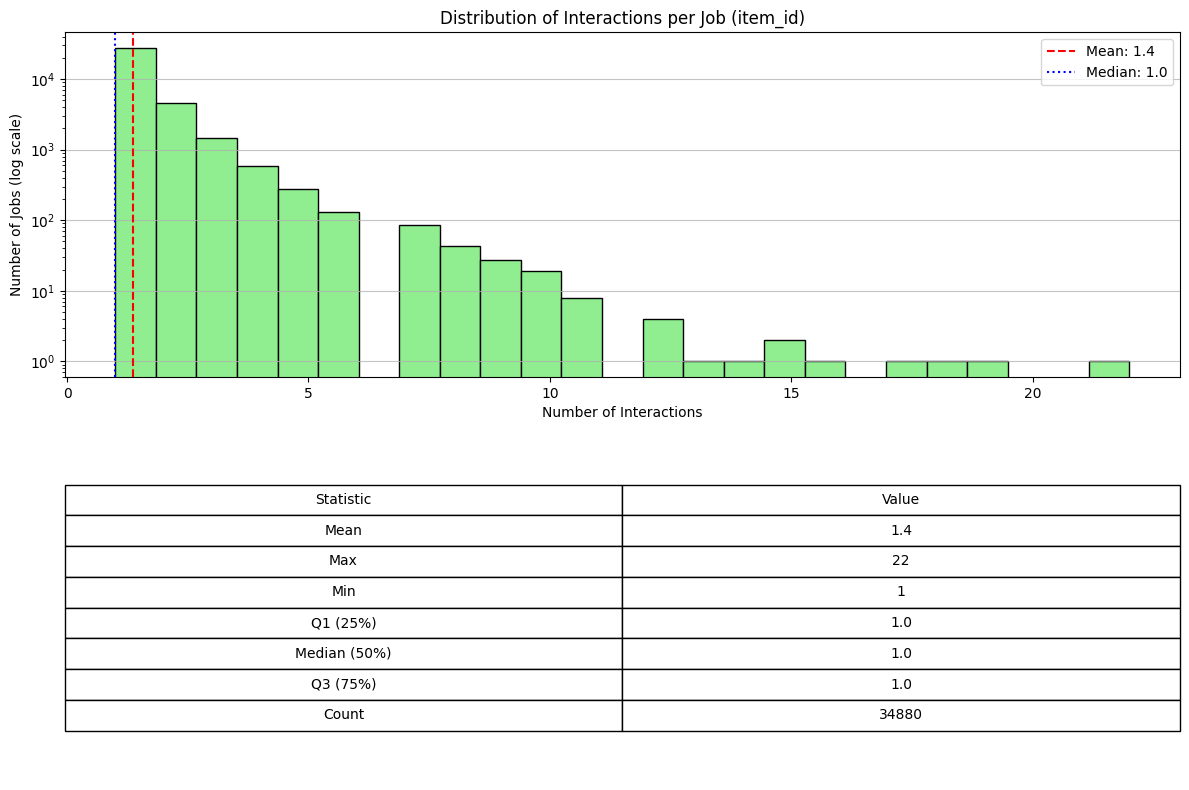


Interaction Statistics per Job (item_id):
Mean: 1.4
Max: 22
Min: 1
Q1 (25%): 1.0
Median (50%): 1.0
Q3 (75%): 1.0
Count: 34880


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Calculate interactions per item (job)
interactions_per_item = interactions.groupby('item_id').size()

# Calculate statistics
stats = {
    'Mean': interactions_per_item.mean(),
    'Max': interactions_per_item.max(),
    'Min': interactions_per_item.min(),
    'Q1 (25%)': np.percentile(interactions_per_item, 25),
    'Median (50%)': np.percentile(interactions_per_item, 50),
    'Q3 (75%)': np.percentile(interactions_per_item, 75),
    'Count': len(interactions_per_item)
}

# Create figure with two subplots (histogram and stats)
plt.figure(figsize=(12, 8))

# Histogram plot
plt.subplot(2, 1, 1)
n, bins, patches = plt.hist(interactions_per_item, 
                            bins=25, 
                            edgecolor='black', 
                            color='lightgreen',
                            log=True)
plt.title('Distribution of Interactions per Job (item_id)')
plt.xlabel('Number of Interactions')
plt.ylabel('Number of Jobs (log scale)')
plt.grid(axis='y', alpha=0.75)

# Add vertical lines for statistics
plt.axvline(stats['Mean'], color='red', linestyle='--', label=f"Mean: {stats['Mean']:.1f}")
plt.axvline(stats['Median (50%)'], color='blue', linestyle=':', label=f"Median: {stats['Median (50%)']:.1f}")
plt.legend()

# Statistics table
plt.subplot(2, 1, 2)
plt.axis('off')
table_data = [[k, f"{v:.1f}" if isinstance(v, float) else v] for k, v in stats.items()]
table = plt.table(cellText=table_data,
                  colLabels=['Statistic', 'Value'],
                  loc='center',
                  cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)

plt.tight_layout()
plt.show()

# Print statistics in console
print("\nInteraction Statistics per Job (item_id):")
for stat, value in stats.items():
    print(f"{stat}: {value:.1f}" if isinstance(value, float) else f"{stat}: {value}")


# Keep only jobs which were interacted with

In [7]:
common = pd.read_csv("../../data/cb12/interim/common_items.csv", header=0, sep='\t')
print(len(common))
print(len(interactions))
print(len(jobs))
common.head()
#common = jobs

34880
47423
34880


,item_id,state,title_emb_0,title_emb_1,title_emb_2,title_emb_3,title_emb_4,title_emb_5,title_emb_6,title_emb_7,...,req_emb_375,req_emb_376,req_emb_377,req_emb_378,req_emb_379,req_emb_380,req_emb_381,req_emb_382,req_emb_383,session_id
0,22,FL,0.031234,-0.058801,-0.023616,-0.037820,-0.058765,0.057291,-0.033577,0.012346,...,0.05112,0.013713,-0.029943,-0.031015,0.029654,0.019965,0.076117,0.038724,-0.024348,67046
1,60,FL,-0.022986,0.054471,-0.016137,0.042382,-0.015666,-0.013569,0.114456,0.057535,...,0.05112,0.013713,-0.029943,-0.031015,0.029654,0.019965,0.076117,0.038724,-0.024348,22043
2,81,FL,-0.038087,0.080151,-0.052039,0.015201,0.042734,0.014598,0.219159,-0.067838,...,0.05112,0.013713,-0.029943,-0.031015,0.029654,0.019965,0.076117,0.038724,-0.024348,55753
3,244,MD,-0.012535,0.010516,-0.009069,0.006332,-0.070244,-0.042980,0.074671,0.048297,...,0.05112,0.013713,-0.029943,-0.031015,0.029654,0.019965,0.076117,0.038724,-0.024348,47597
4,370,FL,-0.023253,0.037175,-0.022867,0.073320,-0.010799,0.072938,-0.011157,-0.040629,...,0.05112,0.013713,-0.029943,-0.031015,0.029654,0.019965,0.076117,0.038724,-0.024348,4202


In [8]:
common['state'] = common['state'].astype(str)
common['state'] = common['state'].replace({"  ": "N/A"})

common.describe(include = 'all')

,item_id,state,title_emb_0,title_emb_1,title_emb_2,title_emb_3,title_emb_4,title_emb_5,title_emb_6,title_emb_7,...,req_emb_375,req_emb_376,req_emb_377,req_emb_378,req_emb_379,req_emb_380,req_emb_381,req_emb_382,req_emb_383,session_id
count,3.488000e+04,34880,34880.000000,34880.000000,34880.000000,34880.000000,34880.000000,34880.000000,34880.000000,34880.000000,...,34880.000000,34880.000000,34880.000000,34880.000000,34880.000000,34880.000000,34880.000000,34880.000000,34880.000000,34880.000000
unique,NaN,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,FL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,3829,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.638870e+05,NaN,-0.058242,0.001931,-0.011678,0.010863,-0.045804,-0.009993,0.053211,0.006555,...,0.026424,0.028619,-0.010237,-0.010844,0.029084,0.037603,0.005326,-0.003224,0.006300,31643.243607
std,3.227262e+05,NaN,0.045022,0.040300,0.042152,0.041164,0.045801,0.041344,0.051969,0.043017,...,0.041213,0.034304,0.033998,0.044654,0.039930,0.054640,0.059741,0.047009,0.034750,20131.811896
min,2.200000e+01,NaN,-0.218250,-0.162441,-0.185125,-0.166879,-0.202901,-0.191714,-0.172632,-0.182668,...,-0.131139,-0.114013,-0.159144,-0.188302,-0.145696,-0.164423,-0.246487,-0.188613,-0.140540,3.000000
25%,2.811210e+05,NaN,-0.087407,-0.027085,-0.037234,-0.015768,-0.077575,-0.033572,0.018652,-0.020427,...,-0.001619,0.009652,-0.029943,-0.039742,0.004859,0.003388,-0.036662,-0.036295,-0.015717,13476.000000
50%,5.662465e+05,NaN,-0.057890,0.002105,-0.011797,0.011478,-0.048717,-0.008969,0.055295,0.003689,...,0.024331,0.024561,-0.012747,-0.015955,0.029654,0.029231,0.000565,-0.004779,0.003470,30290.000000
75%,8.454805e+05,NaN,-0.029261,0.028201,0.016142,0.040164,-0.015426,0.016037,0.089706,0.033649,...,0.051251,0.052244,0.012141,0.019290,0.051971,0.067814,0.041478,0.036578,0.027680,48956.000000


In [9]:
%matplotlib inline
def plot_bar(df, column):
    f, ax = plt.subplots(1,1,figsize=(15,8))

    df[column] = df[column].str.replace('_',' ')
    
    df[column].value_counts().plot(kind="bar", ax = ax, color = "skyblue", ec="black", logy=True)
    ax.tick_params(axis='x', rotation=0)
    
    font = 50
    font_tick = 30

    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(font_tick) 
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(font_tick) 
    
    ax.get_yaxis().set_major_formatter(
        tck.FuncFormatter(lambda x, p: format(int(x), ',')))

    col_str = column.replace("_", " ").title()
    ax.set_xlabel(col_str, fontsize = font)
    plt.setp(ax.get_xticklabels(), rotation=90)
    ax.set_ylabel('\# Count', fontsize = font)
    
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(18) 

    
    f.tight_layout()
    f.savefig("../../plots/cb12_dist_" + column + ".pdf", dpi=300, bbox_inches='tight')

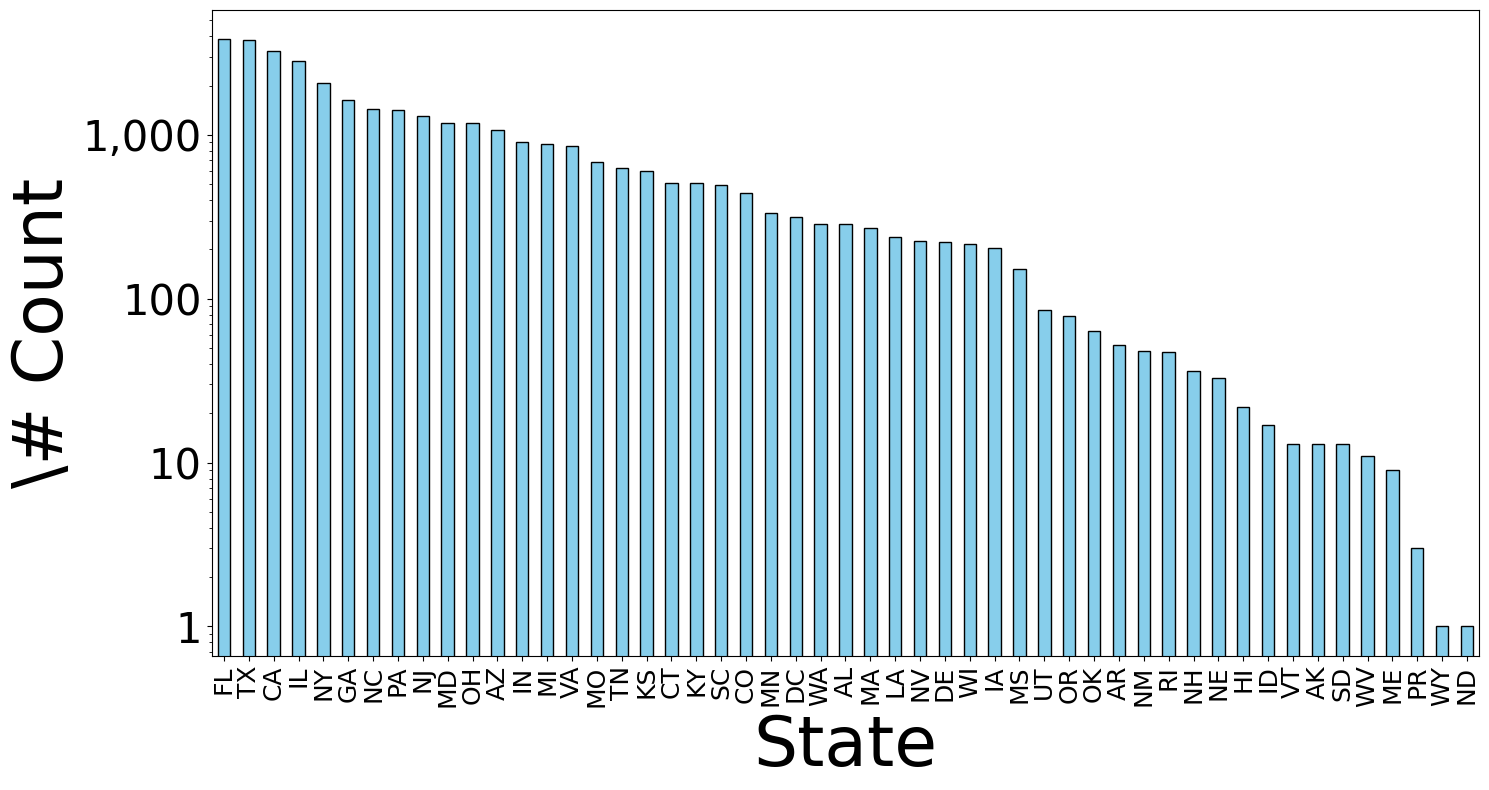

In [10]:
plot_bar(common, "state")

In [11]:
common[['state']].value_counts()

state
FL       3829
TX       3819
CA       3248
IL       2821
NY       2085
GA       1643
NC       1448
PA       1422
NJ       1306
MD       1190
OH       1179
AZ       1068
IN        909
MI        880
VA        861
MO        685
TN        627
KS        601
CT        512
KY        511
SC        496
CO        443
MN        334
DC        317
WA        287
AL        284
MA        272
LA        238
NV        224
DE        223
WI        217
IA        203
MS        152
UT         85
OR         78
OK         64
AR         52
NM         48
RI         47
NH         36
NE         33
HI         22
ID         17
VT         13
AK         13
SD         13
WV         11
ME          9
PR          3
ND          1
WY          1
Name: count, dtype: int64